# KNN

In [1]:
# import all libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
import time
import json

In [2]:
# Load the Training and Testing Data
x_train = pd.read_pickle('data/x_train.pkl')
y_train = pd.read_pickle('data/y_train.pkl')

x_test = pd.read_pickle('data/x_test.pkl')
y_test = pd.read_pickle('data/y_test.pkl')

## Min Max Normalization

In [3]:
# Normalize features to [0,1]
minmax_scaler = MinMaxScaler()
x_train = pd.DataFrame(minmax_scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(minmax_scaler.fit_transform(x_test), columns=x_test.columns)

## Implementing Basic KNN

In [4]:
# model
k_nearest_neighbors = KNeighborsClassifier(metric='euclidean', 
                                            n_neighbors=5)

# fit the model
k_nearest_neighbors.fit(x_train, y_train)

# prediction
predictions = k_nearest_neighbors.predict(x_test)

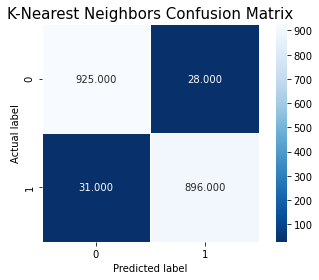

In [5]:
cm = confusion_matrix(y_test, predictions)
plt.figure()
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('K-Nearest Neighbors Confusion Matrix', size = 15);
plt.show()

In [6]:
# Performance
f1_score_stroke_vanilla = f1_score(y_true=y_test, y_pred=predictions, pos_label=1)
f1_score_no_stroke_vanilla = f1_score(y_true=y_test, y_pred=predictions, pos_label=0)

f1_score_stroke_vanilla = round(f1_score_stroke_vanilla*100, 3)
f1_score_no_stroke_vanilla = round(f1_score_no_stroke_vanilla*100, 3)



print(f'F1 score for class Stroke = 1 --> {f1_score_stroke_vanilla}%')
print(f'F1 score for class Stroke = 0 --> {f1_score_no_stroke_vanilla}%')

F1 score for class Stroke = 1 --> 96.813%
F1 score for class Stroke = 0 --> 96.909%


In [7]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       953
           1       0.97      0.97      0.97       927

    accuracy                           0.97      1880
   macro avg       0.97      0.97      0.97      1880
weighted avg       0.97      0.97      0.97      1880



## Hyperparameter Tuning for Better Results

We will tune for:
- n_neighbors - number of neighbors, odd values from 1-49

In [8]:
# create a list of odd n neighbors to tune for
n_neighbors = list()
for i in range(1,50,2):
    n_neighbors.append(i)

#Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors)

print(hyperparameters)

{'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]}


In [9]:
# Implement GridSearch to check and get the best hyperparameters

# estimator = ML model to be tested
# param_grid = dictionary of hyperparameters to be tested
# scoring = the scoring metric, for this imbalanced classification task, i chose f1
# n_jobs = number of cores to be used in parallel, -1 means use all
# cv = number of cross validation set elements

best_model = GridSearchCV(estimator=KNeighborsClassifier(metric='euclidean'), 
                          param_grid=hyperparameters, 
                          scoring = 'f1',
                          n_jobs=-1,
                          cv=10)

# Fit the model
best_model = best_model.fit(x_train,y_train)

In [10]:
n_neighbors = best_model.best_estimator_.get_params()['n_neighbors']

print(f'Best n_neighbors: {n_neighbors}')

Best n_neighbors: 3


## Use New Hyperparameters

In [11]:
# start timer
start_time = time.time()

# model
k_nearest_neighbors = KNeighborsClassifier(metric='euclidean', 
                                            n_neighbors=n_neighbors)

# fit the model
k_nearest_neighbors.fit(x_train, y_train)

# Time to train
time_to_train = round((time.time() - start_time)*1000, 3)
print(f'Time to Train --> {time_to_train} ms')

Time to Train --> 3.7 ms


In [12]:
# start timer
start_time = time.time()

# prediction
predictions = k_nearest_neighbors.predict(x_test)

# Inference time
inference_time = round((time.time() - start_time)*1000, 3)
print(f'Inference time --> {inference_time} ms')

Inference time --> 417.14 ms


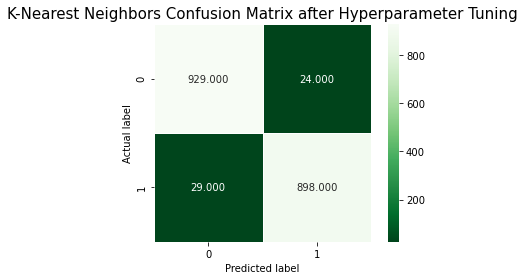

In [13]:
cm = confusion_matrix(y_test, predictions)
plt.figure()
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('K-Nearest Neighbors Confusion Matrix after Hyperparameter Tuning', size = 15);
plt.show()

In [14]:
# Performance after hyperparameter tuning
f1_score_stroke_hp_tuning = f1_score(y_true=y_test, y_pred=predictions, pos_label=1)
f1_score_no_stroke_hp_tuning = f1_score(y_true=y_test, y_pred=predictions, pos_label=0)

f1_score_stroke_hp_tuning = round(f1_score_stroke_hp_tuning*100, 3)
f1_score_no_stroke_hp_tuning = round(f1_score_no_stroke_hp_tuning*100, 3)

print(f'F1 score for class Stroke = 1 --> {f1_score_stroke_hp_tuning}%')
print(f'F1 score for class Stroke = 0 --> {f1_score_no_stroke_hp_tuning}%')

F1 score for class Stroke = 1 --> 97.134%
F1 score for class Stroke = 0 --> 97.227%


In [15]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       953
           1       0.97      0.97      0.97       927

    accuracy                           0.97      1880
   macro avg       0.97      0.97      0.97      1880
weighted avg       0.97      0.97      0.97      1880



In [16]:
# percentage improvement due to hyperparameter tuning
score_increase_stroke = round(((f1_score_stroke_hp_tuning - f1_score_stroke_vanilla)/f1_score_stroke_vanilla)*100, 3)
score_increase_no_stroke = round(((f1_score_no_stroke_hp_tuning - f1_score_no_stroke_vanilla)/f1_score_no_stroke_vanilla)*100, 3)

print(f'Percentage increase for F1 score with stroke --> {score_increase_stroke}%')
print(f'Percentage increase for F1 score without stroke --> {score_increase_no_stroke}%')

Percentage increase for F1 score with stroke --> 0.332%
Percentage increase for F1 score without stroke --> 0.328%


In [17]:
print(f1_score_stroke_vanilla)
print(f1_score_no_stroke_vanilla)
print('---------------------------------')
print(f1_score_stroke_hp_tuning)
print(f1_score_no_stroke_hp_tuning)
print('---------------------------------')
print(score_increase_stroke)
print(score_increase_no_stroke)
print('---------------------------------')
print(time_to_train)
print(inference_time)

96.813
96.909
---------------------------------
97.134
97.227
---------------------------------
0.332
0.328
---------------------------------
3.7
417.14


## Saving numbers to JSON

Since this is the first model, this will create the JSON file, the other models will add to it

In [18]:
json_dict = dict()

json_dict['knn'] = {
    "scores_vanilla":{"with_stroke":f1_score_stroke_vanilla, "without_stroke":f1_score_no_stroke_vanilla},
    "scores_after_hp_tuning":{"with_stroke":f1_score_stroke_hp_tuning, "without_stroke":f1_score_no_stroke_hp_tuning},
    "percentage_increase":{"with_stroke":score_increase_stroke, "without_stroke":score_increase_no_stroke},
    "time":{"time_to_train_final_model":time_to_train, "inference_time_on_final_model":inference_time}}

In [19]:
with open('data.json', 'w') as fp:
    json.dump(json_dict, fp,  indent=4)